In [4]:
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

## Chapter 13 푸리에 급수로 음파 분석하기
#### 디지털 오디오 데이터는 컴퓨터로 표현한 음파이며 음파는 기압이 반복적으로 변화하며 귀가 소리로 인식하는 것이다.
#### 음파를 함수로 생각하면 벡터처럼 더하거나 확대, 축소가 가능하다.
#### 음파가 나타내는 소리의 종류를 파악하고자 적분을 사용할 수도 있다.
#### 디지털 오디오 파일은 시간에 대한 진동을 묘사하는 함수로 볼 수 있다.
#### 오디오 소프트웨어는 이 함수를 번역하고 함수에 따라 스피커가 진동하도록 지시한다.
#### 함수가 시간에 따라 기압 변화를 나타낸다는 정도로 생각하면 된다.
#### 음표가 나타내는 소리 또한 패턴이 반복되는 음파로 나타낼수 있고 이 함수가 스스로 반복하는 속도를 `주파수`라고 한다.
#### 주파수는 음표가 나타내는 소리의 고저를 알려준다.
#### 음질 또는 음색은 음성과 같이 패턴이 반복하는 모양에 따라 달라진다.
---
## 13.1 음파를 결합하고 분해하기
#### 기존 음파를 결합해 새 음파를 만드는 작업과 복잡한 음파를 간단한 음파들로 분해하는 작업 두가지를 진행할 것이다.
#### 함수에 대응하는 소리를 만들기 위해 해당 함수의 그래프에서 몇몇 y값을 추출하고 배열 형태로 오디오 라이브러리에 전달하는 샘플링 작업을 한다.
#### 주요 음파 함수는 주기함수인데 주기함수의 그래프는 같은 모양이 반복되어 만들어진다.
#### 정현함수를 주로 사용할 것인데 정현함수는 자연스럽게 들리는 음표를 생성하는 sin,cos함수를 포함하는 주기 함수의 집합이다.
#### 정현함수를 샘플링해서 수열을 만들고 음표를 재생하는 함수를 만들 것이다.
#### 개별 음표를 만들면 여러 음표를 합쳐 화음 또는 여러가지 소리를 재생할 수 있다.
#### 이렇게하기 위해 각 음파를 정의하는 함수를 더하면 된다.
#### 반대로 음파를 나타내는 함수를 분해해서 각 음파를 만드는 음표와 음량의 곱의 합으로 표현할 수 있다.
#### 이런것을 푸리에 급수라고 한다. 푸리에 급수를 구성하는 음파를 알고 있으면 이를 합쳐서 원래의 소리를 얻을 수 있다.
#### 푸리에 급수를 구하는 과정을 수학적으로 보면 어떤 함수를 sin, cos함수의 합으로 나타내는 것이다.
---
## 13.2 파이썬으로 음파 재생하기
#### PyGame 라이브러리를 사용할 것이다. PyGame 라이브러리에는 수 배열을 입력으로 받아 소리를 재생하는 함수가 있다.
#### 랜덤한 수열을 만들고 라이브러리를 사용해 수열을 번역해 소리를 재생하는 코드를 만들것이다.
### 13.2.1 소리를 처음으로 만들어보기
#### 샘플링 주파수를 44,100Hz로 설정할 것이다. 이러한 설정에서 오디오 데이터는 초당 44,100개의 성분을 가지는 배열로 나타난다.
#### 각 성분은 -32,768 ~ +32,768 사이의 값을 가지는 16비트 정수이다. 
#### 각 타임스텝에서 소리의 강도를 나타내며 1초당 타임스텝은 44,100번 있다.
#### 소리의 비트 심도를 설정해야하는데 주파수가 이미지의 해상도와 유사한 것처럼 비트심도는 허용되는 픽셀 색상의 수와 비슷하다.
#### 비트 심도가 높으면 소리 강도의 범위가 더 세밀하다고 할 수 있는 것이다.

In [22]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size = -16, channels=1)

In [14]:
import numpy as np
arr = np.random.randint(-32768,32767, size = 44100)
arr

array([ 18414,  17373, -23800, ...,  -9333,  25122,  27762])

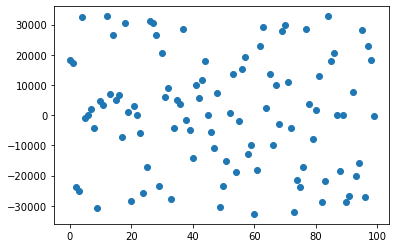

In [15]:
plot_sequence(arr, max=100) # 처음 100개의 산점도 확인

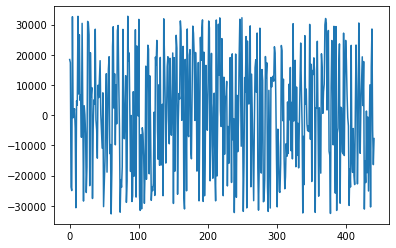

In [16]:
plot_sequence(arr, line = True, max = 441)

#### 44,100개의 값은 1초짜리 소리를 정의하므로 441개의 값은 100분의 1초짜리 소리를 정의힌다.

In [23]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

ValueError: Array must be 2-dimensional for stereo mixer